<a href="https://colab.research.google.com/github/SebasMore07/SistemasDyC/blob/main/Simulaciones/SIMULACI%C3%93N_2_Grupo_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pregunta 1

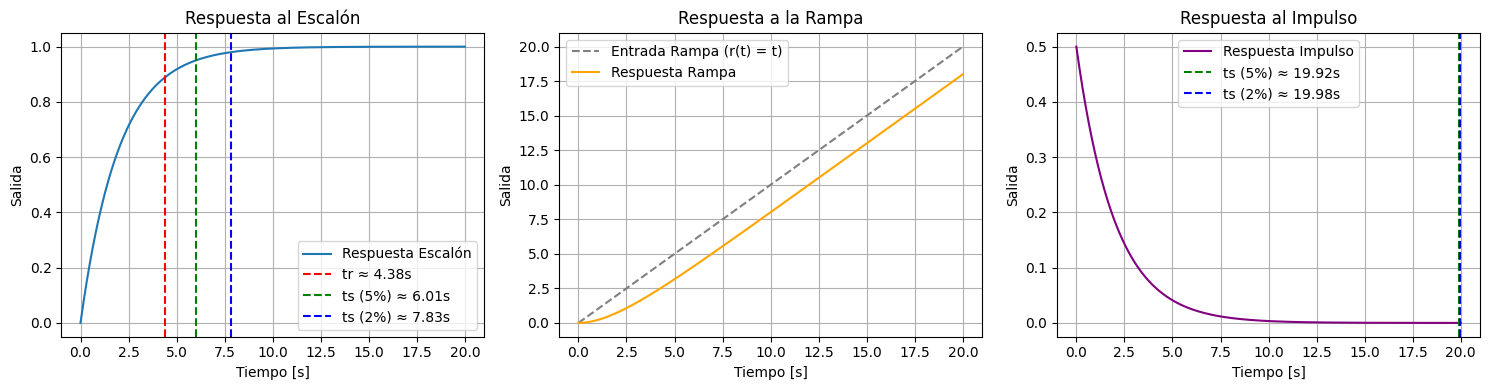

--- Resultados para T = 2 ---
Tiempo de levantamiento (tr): 4.38 s
Tiempo de establecimiento al 5%: 6.01 s
Tiempo de establecimiento al 2%: 7.83 s
Tiempo de establecimiento impulso al 5%: 19.92 s
Tiempo de establecimiento impulso al 2%: 19.98 s


In [4]:
# --- Instalar librería necesaria (solo se ejecuta en Colab) ---
!pip install control --quiet

# --- Importar librerías ---
import numpy as np
import matplotlib.pyplot as plt
# Importar el módulo control directamente
import control # Cambiado de control.matlab

# --- Parámetros del sistema ---
T = 2
# Usar control.tf en lugar de ctrl.tf
G = control.tf([1/T], [1, 1/T])  # G(s) = (1/T)/(s + 1/T)

# --- Tiempo de simulación ---
t = np.linspace(0, 20, 1000)

# --- Respuestas ---
# Usar control.step_response en lugar de ctrl.step_response
t_step, y_step = control.step_response(G, t)
# Usar control.forced_response en lugar de ctrl.forced_response
t_ramp, y_ramp = control.forced_response(G, T=t, U=t)
# Usar control.impulse_response en lugar de ctrl.impulse_response
t_imp, y_imp = control.impulse_response(G, t)

# --- Funciones para calcular tiempos ---
def calc_tiempo_estable(t, y, porcentaje):
    final = y[-1]
    margen = porcentaje * final
    for i in range(len(y)):
        if np.all(np.abs(y[i:] - final) < margen):
            return t[i]
    return None

def calc_tiempo_levantamiento(t, y):
    y_10 = 0.1 * y[-1]
    y_90 = 0.9 * y[-1]
    i_10 = next(i for i in range(len(y)) if y[i] >= y_10)
    i_90 = next(i for i in range(len(y)) if y[i] >= y_90)
    return t[i_90] - t[i_10]

# --- Cálculos para escalón ---
tr = calc_tiempo_levantamiento(t_step, y_step)
ts_5 = calc_tiempo_estable(t_step, y_step, 0.05)
ts_2 = calc_tiempo_estable(t_step, y_step, 0.02)

# --- Cálculos para impulso ---
ts_5_imp = calc_tiempo_estable(t_imp, y_imp, 0.05)
ts_2_imp = calc_tiempo_estable(t_imp, y_imp, 0.02)

# --- Graficar ---
plt.figure(figsize=(15, 4))

# Escalón
plt.subplot(1, 3, 1)
plt.plot(t_step, y_step, label='Respuesta Escalón')
plt.title('Respuesta al Escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.grid(True)
plt.axvline(tr, color='r', linestyle='--', label=f'tr ≈ {tr:.2f}s')
plt.axvline(ts_5, color='g', linestyle='--', label=f'ts (5%) ≈ {ts_5:.2f}s')
plt.axvline(ts_2, color='b', linestyle='--', label=f'ts (2%) ≈ {ts_2:.2f}s')
plt.legend()

# Rampa
entrada_rampa = t  # r(t) = t
plt.subplot(1, 3, 2)
plt.plot(t, entrada_rampa, label='Entrada Rampa (r(t) = t)', linestyle='--', color='gray')
plt.plot(t_ramp, y_ramp, label='Respuesta Rampa', color='orange')
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.grid(True)
plt.legend()

# Impulso
plt.subplot(1, 3, 3)
plt.plot(t_imp, y_imp, label='Respuesta Impulso', color='purple')
plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.grid(True)
plt.axvline(ts_5_imp, color='g', linestyle='--', label=f'ts (5%) ≈ {ts_5_imp:.2f}s')
plt.axvline(ts_2_imp, color='b', linestyle='--', label=f'ts (2%) ≈ {ts_2_imp:.2f}s')
plt.legend()

plt.tight_layout()
plt.show()

# --- Imprimir resultados numéricos ---
print(f"--- Resultados para T = {T} ---")
print(f"Tiempo de levantamiento (tr): {tr:.2f} s")
print(f"Tiempo de establecimiento al 5%: {ts_5:.2f} s")
print(f"Tiempo de establecimiento al 2%: {ts_2:.2f} s")
print(f"Tiempo de establecimiento impulso al 5%: {ts_5_imp:.2f} s")
print(f"Tiempo de establecimiento impulso al 2%: {ts_2_imp:.2f} s")

## Pregunta 2

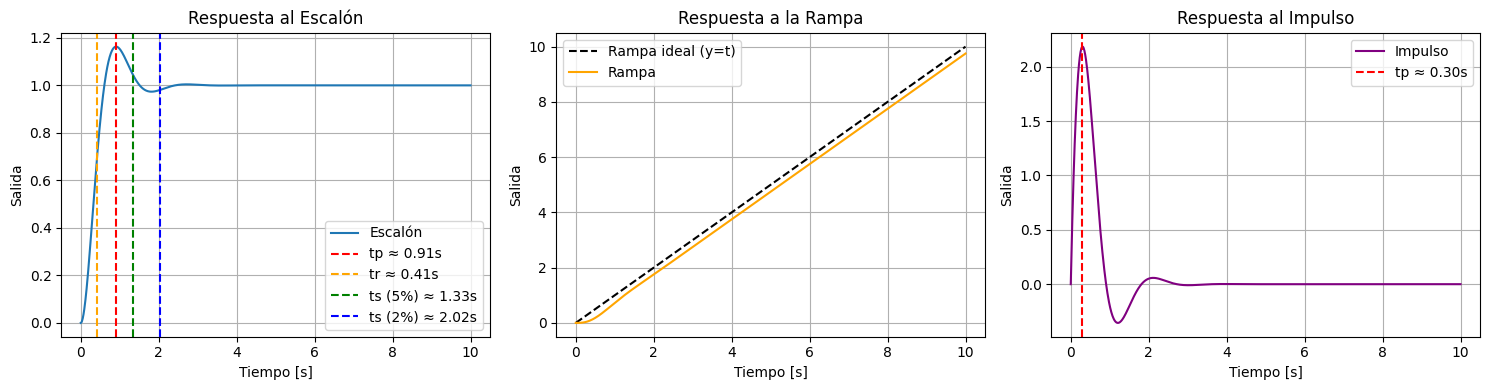

--- Resultados (Sistema de Segundo Orden Subamortiguado) ---
ωn = 4, ξ = 0.5

[Escalón]
Máximo sobreimpulso: 16.30%
Tiempo pico: 0.91 s
Tiempo de levantamiento: 0.41 s
Tiempo de establecimiento al 5%: 1.33 s
Tiempo de establecimiento al 2%: 2.02 s

[Impulso]
Pico del impulso: 2.19
Tiempo pico: 0.30 s
Tiempo de establecimiento al 5%: No encontrado
Tiempo de establecimiento al 2%: No encontrado


In [10]:
# --- Instalar librería necesaria ---
!pip install control --quiet

# --- Importar librerías ---
import numpy as np
import matplotlib.pyplot as plt
# Importar las funciones directamente desde el módulo control
import control # Cambiado de import control.matlab as ctrl

# --- Parámetros del sistema ---
wn = 4
xi = 0.5
num = [wn**2]
den = [1, 2*xi*wn, wn**2]
# Usar control.tf en lugar de ctrl.tf
G = control.tf(num, den)

# --- Tiempo de simulación ---
t = np.linspace(0, 10, 1000)

# --- Respuestas ---
# Usar control.step_response en lugar de ctrl.step_response
t_step, y_step = control.step_response(G, t)
# Usar control.forced_response en lugar de ctrl.forced_response
t_ramp, y_ramp = control.forced_response(G, T=t, U=t)
# Usar control.impulse_response en lugar de ctrl.impulse_response
t_imp, y_imp = control.impulse_response(G, t)

# --- Cálculos para escalón ---
final_value = y_step[-1]
mp = (np.max(y_step) - final_value) / final_value * 100  # % máximo sobreimpulso
tp = t_step[np.argmax(y_step)]  # tiempo pico

def calc_tr(y, t):
    y_10 = 0.1 * final_value
    y_90 = 0.9 * final_value
    # Added checks to ensure y_10 and y_90 are within the range of y
    try:
        i_10 = next(i for i in range(len(y)) if y[i] >= y_10)
    except StopIteration:
        i_10 = 0 # Default to start if 10% is never reached
    try:
        i_90 = next(i for i in range(len(y)) if y[i] >= y_90)
    except StopIteration:
        i_90 = len(y) - 1 # Default to end if 90% is never reached

    # Ensure i_90 is not less than i_10 in case of non-monotonic responses
    if i_90 < i_10:
        return 0 # Or handle as appropriate for your system

    return t[i_90] - t[i_10]


def calc_ts(y, t, tol):
    # Ensure final_value is not zero to avoid division by zero
    if final_value == 0:
        # If final value is zero, check if the response stays within the tolerance around zero
        for i in range(len(y)):
            if np.all(np.abs(y[i:]) < tol * np.max(np.abs(y))): # Use max absolute value for scaling
                return t[i]
        return None
    else:
        for i in range(len(y)):
            if np.all(np.abs(y[i:] - final_value) < tol * final_value):
                return t[i]
        return None


tr = calc_tr(y_step, t)
ts_5 = calc_ts(y_step, t, 0.05)
ts_2 = calc_ts(y_step, t, 0.02)

# --- Cálculos para impulso ---
final_imp = y_imp[-1]
# Adjusted mp_imp calculation to handle potential division by zero and potentially meaningless overshoots for non-step responses
# For impulse, max_impulse is more relevant than overshoot relative to a final value (which is often 0)
max_impulse_value = np.max(y_imp)
# Depending on the system, peak time and settling time for impulse response are often measured differently than for step response.
# Assuming the user wants to find when the impulse response settles towards its final value (often 0 for stable systems).
# Re-using calc_ts with the impulse response and its final value (which should be close to 0 for a stable system)
ts_5_imp = calc_ts(y_imp, t_imp, 0.05) # Use t_imp for impulse response settling time
ts_2_imp = calc_ts(y_imp, t_imp, 0.02) # Use t_imp for impulse response settling time

# Peak time for impulse response is the time of the maximum value
tp_imp = t_imp[np.argmax(y_imp)] if len(y_imp) > 0 else None # Ensure y_imp is not empty

# For impulse, max overhoot relative to final value might not be meaningful if final value is 0.
# Let's calculate the peak value instead.
peak_impulse = np.max(y_imp)


# --- Graficar respuestas ---
plt.figure(figsize=(15, 4))

# Escalón
plt.subplot(1, 3, 1)
plt.plot(t_step, y_step, label='Escalón')
# Add vertical lines for calculated step response parameters
if tp is not None:
    plt.axvline(tp, color='r', linestyle='--', label=f'tp ≈ {tp:.2f}s')
if tr is not None:
    plt.axvline(tr, color='orange', linestyle='--', label=f'tr ≈ {tr:.2f}s')
if ts_5 is not None:
    plt.axvline(ts_5, color='g', linestyle='--', label=f'ts (5%) ≈ {ts_5:.2f}s')
if ts_2 is not None:
    plt.axvline(ts_2, color='b', linestyle='--', label=f'ts (2%) ≈ {ts_2:.2f}s')

plt.title('Respuesta al Escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.grid(True)
plt.legend()

# Rampa
entrada_rampa = t  # r(t) = t
plt.subplot(1, 3, 2)
plt.plot(t, t, 'k--', label='Rampa ideal (y=t)')
plt.plot(t_ramp, y_ramp, label='Rampa', color='orange')
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.grid(True)
plt.legend()

# Impulso
plt.subplot(1, 3, 3)
plt.plot(t_imp, y_imp, label='Impulso', color='purple')
# Add vertical lines for calculated impulse response parameters
if tp_imp is not None:
    plt.axvline(tp_imp, color='r', linestyle='--', label=f'tp ≈ {tp_imp:.2f}s')
if ts_5_imp is not None:
    plt.axvline(ts_5_imp, color='g', linestyle='--', label=f'ts (5%) ≈ {ts_5_imp:.2f}s')
if ts_2_imp is not None:
    plt.axvline(ts_2_imp, color='b', linestyle='--', label=f'ts (2%) ≈ {ts_2_imp:.2f}s')

plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# --- Imprimir resultados ---
print("--- Resultados (Sistema de Segundo Orden Subamortiguado) ---")
print(f"ωn = {wn}, ξ = {xi}")
print(f"\n[Escalón]")
print(f"Máximo sobreimpulso: {mp:.2f}%")
print(f"Tiempo pico: {tp:.2f} s" if tp is not None else "Tiempo pico: No encontrado")
print(f"Tiempo de levantamiento: {tr:.2f} s" if tr is not None else "Tiempo de levantamiento: No encontrado")
print(f"Tiempo de establecimiento al 5%: {ts_5:.2f} s" if ts_5 is not None else "Tiempo de establecimiento al 5%: No encontrado")
print(f"Tiempo de establecimiento al 2%: {ts_2:.2f} s" if ts_2 is not None else "Tiempo de establecimiento al 2%: No encontrado")

print(f"\n[Impulso]")
print(f"Pico del impulso: {peak_impulse:.2f}") # Printing peak value instead of mp_imp
print(f"Tiempo pico: {tp_imp:.2f} s" if tp_imp is not None else "Tiempo pico: No encontrado")
print(f"Tiempo de establecimiento al 5%: {ts_5_imp:.2f} s" if ts_5_imp is not None else "Tiempo de establecimiento al 5%: No encontrado")
print(f"Tiempo de establecimiento al 2%: {ts_2_imp:.2f} s" if ts_2_imp is not None else "Tiempo de establecimiento al 2%: No encontrado")

## Pregunta 3

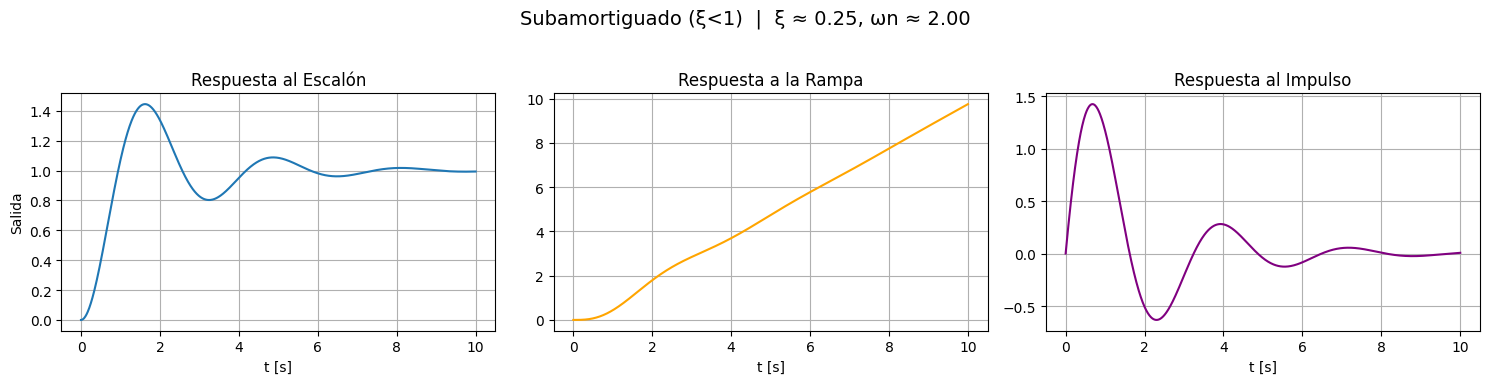

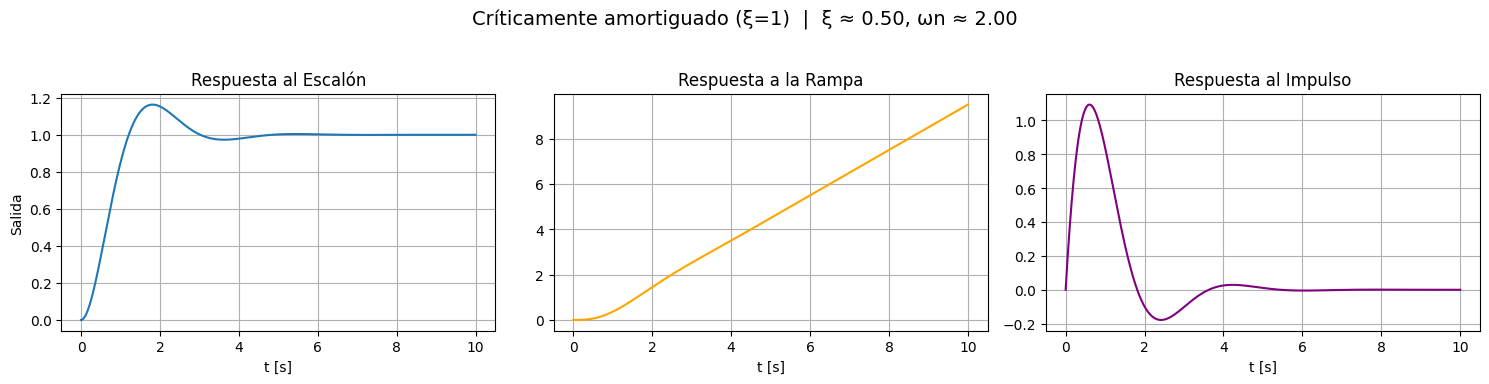

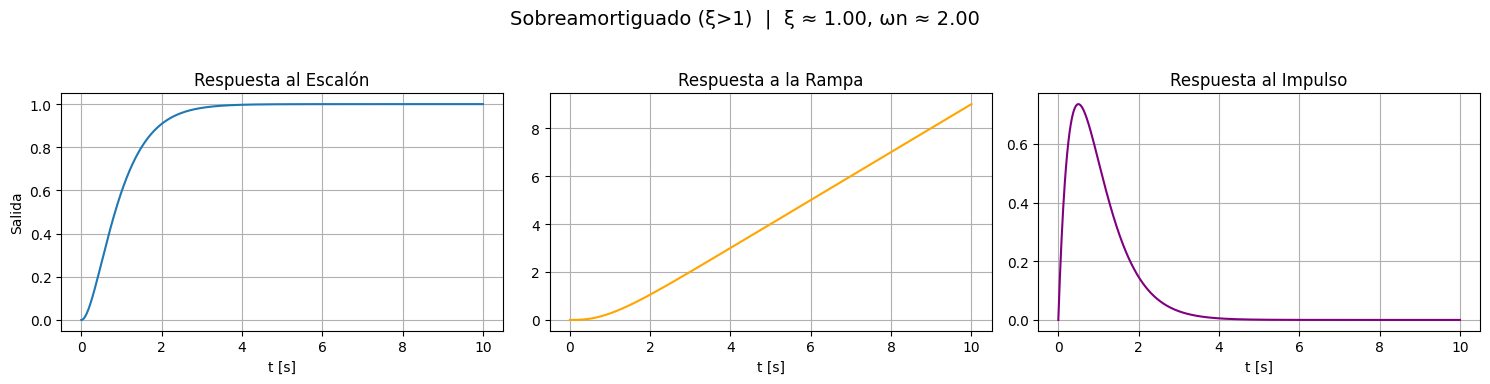

In [13]:
# --- Instalar librería necesaria ---
!pip install control --quiet

# --- Importar librerías ---
import numpy as np
import matplotlib.pyplot as plt
# Importar las funciones directamente desde el módulo control
# Importar control.matlab as ctrl if needed for other functions, but
# use the main 'control' module for response functions.
import control

# --- Definición de sistema RLC ---
def get_sys(R, L, C):
    num = [1]
    den = [L*C, R*C, 1]
    # Use control.tf instead of ctrl.tf if not using control.matlab heavily
    # or if control.matlab isn't imported as ctrl.
    # Since we imported 'control', use control.tf
    return control.tf(num, den)

# --- Casos ---
params = {
    'Subamortiguado (ξ<1)': {'R': 1, 'L': 1, 'C': 0.25},
    'Críticamente amortiguado (ξ=1)': {'R': 2, 'L': 1, 'C': 0.25},
    'Sobreamortiguado (ξ>1)': {'R': 4, 'L': 1, 'C': 0.25},
}

t = np.linspace(0, 10, 1000)

# --- Graficar ---
for case, vals in params.items():
    R, L, C = vals['R'], vals['L'], vals['C']
    # Call get_sys which now uses control.tf
    G = get_sys(R, L, C)
    wn = 1 / np.sqrt(L*C)
    xi = R / (2 * np.sqrt(L/C))

    # Call response functions from the 'control' module
    t_step, y_step = control.step_response(G, t)
    t_ramp, y_ramp = control.forced_response(G, T=t, U=t)
    t_imp, y_imp = control.impulse_response(G, t)

    # Gráficas
    plt.figure(figsize=(15, 4))
    plt.suptitle(f'{case}  |  ξ ≈ {xi:.2f}, ωn ≈ {wn:.2f}', fontsize=14)

   # Escalón
    plt.subplot(1, 3, 1)
    plt.plot(t_step, y_step)
    plt.title('Respuesta al Escalón')
    plt.grid(True)
    plt.xlabel('t [s]')
    plt.ylabel('Salida')

   # Rampa
    plt.subplot(1, 3, 2)
    plt.plot(t_ramp, y_ramp, color='orange')
    plt.title('Respuesta a la Rampa')
    plt.grid(True)
    plt.xlabel('t [s]')

   # Impulso
    plt.subplot(1, 3, 3)
    plt.plot(t_imp, y_imp, color='purple')
    plt.title('Respuesta al Impulso')
    plt.grid(True)
    plt.xlabel('t [s]')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Pregunta 4

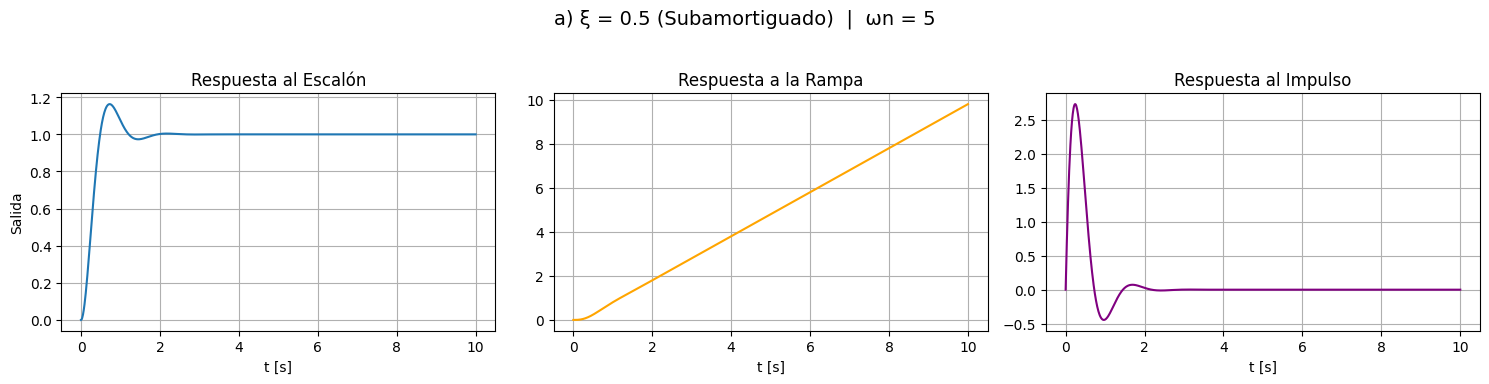

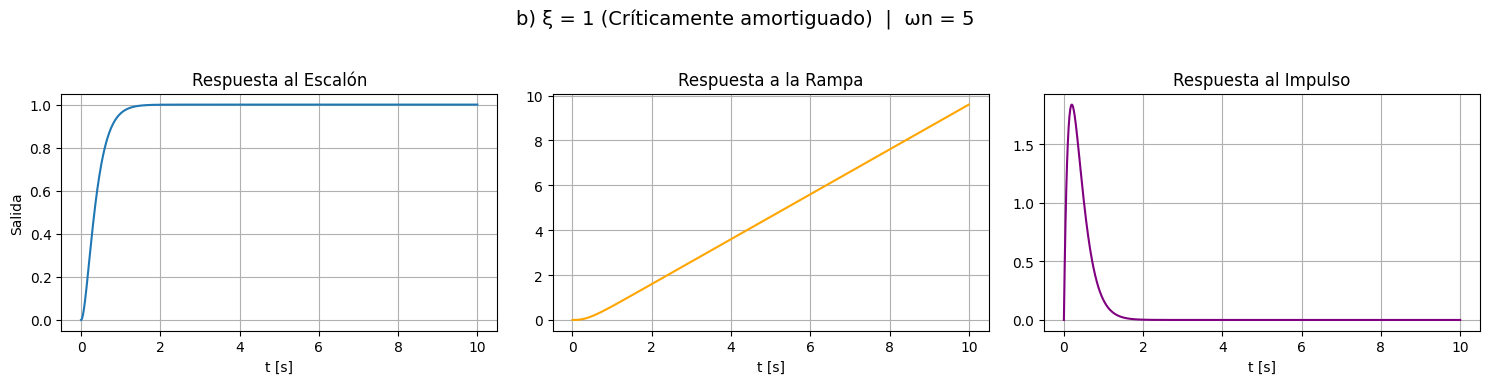

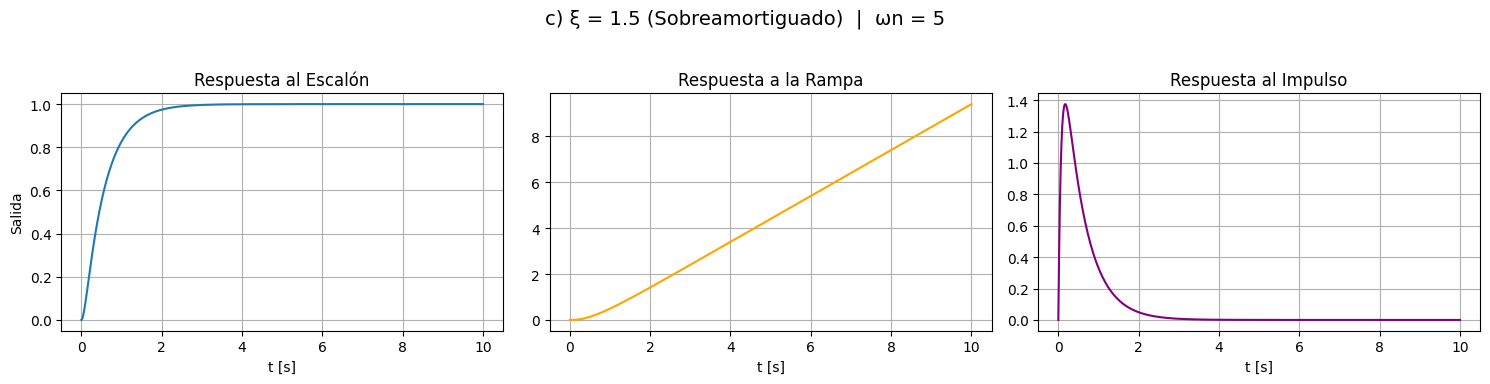

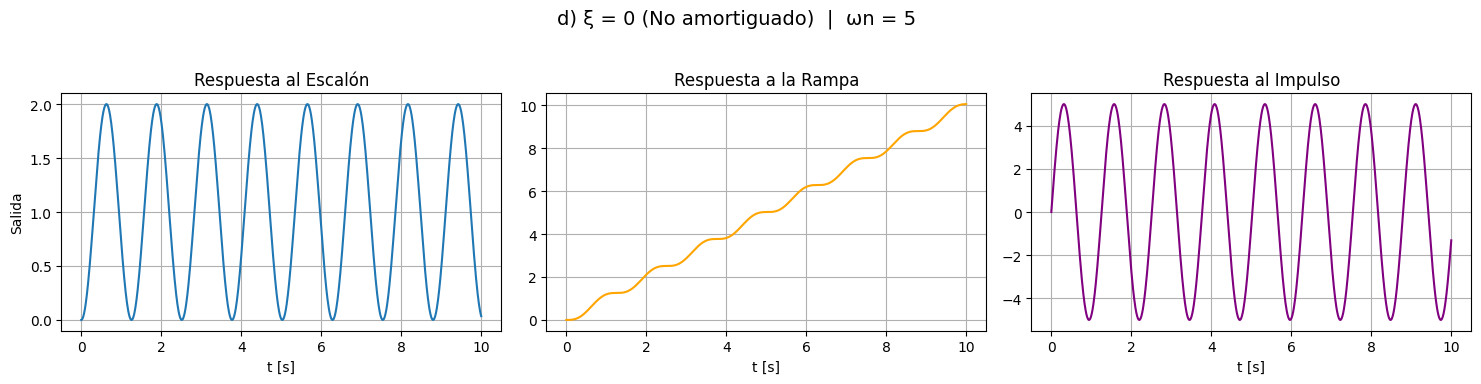

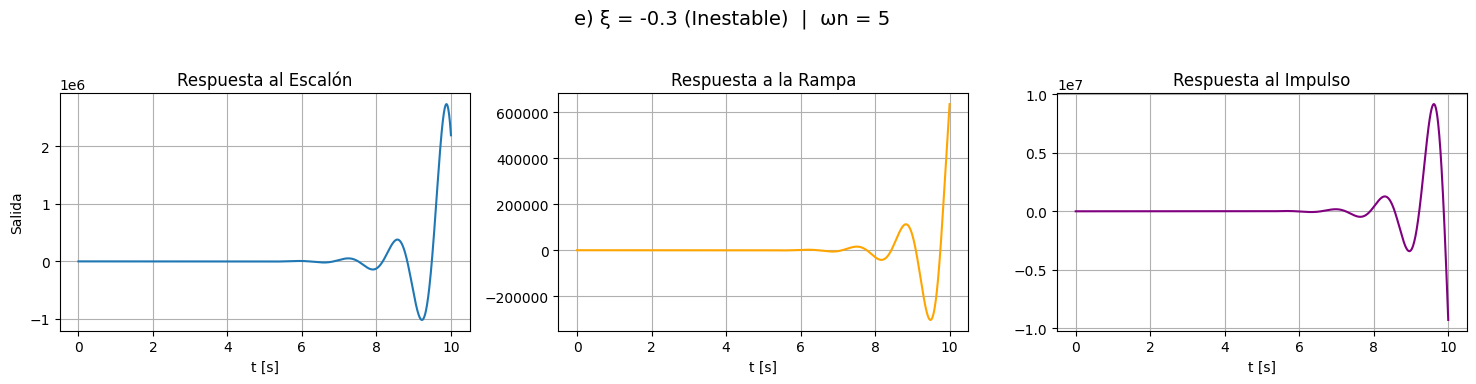

In [2]:
# --- Instalar librería necesaria ---
!pip install control --quiet

# --- Importar librerías ---
import numpy as np
import matplotlib.pyplot as plt
# Importar las funciones directamente desde el módulo control
# Usar el módulo 'control' directamente para las funciones de respuesta
import control # Cambiado de import control.matlab as ctrl

# --- Parámetros comunes ---
wn = 5
t = np.linspace(0, 10, 1000)

# --- Casos con distintos ξ ---
casos = {
    'a) ξ = 0.5 (Subamortiguado)': 0.5,
    'b) ξ = 1 (Críticamente amortiguado)': 1.0,
    'c) ξ = 1.5 (Sobreamortiguado)': 1.5,
    'd) ξ = 0 (No amortiguado)': 0.0,
    'e) ξ = -0.3 (Inestable)': -0.3
}

# --- Generar gráficas ---
for descripcion, xi in casos.items():
    num = [wn**2]
    den = [1, 2*xi*wn, wn**2]
    # Usar control.tf ya que importamos control directamente
    G = control.tf(num, den)

    # Respuestas
    # Usar control.step_response, control.forced_response, control.impulse_response
    t_step, y_step = control.step_response(G, t)
    t_ramp, y_ramp = control.forced_response(G, T=t, U=t)
    t_imp, y_imp = control.impulse_response(G, t)

    # Gráficas
    plt.figure(figsize=(15, 4))
    plt.suptitle(f'{descripcion}  |  ωn = {wn}', fontsize=14)

    plt.subplot(1, 3, 1)
    plt.plot(t_step, y_step)
    plt.title('Respuesta al Escalón')
    plt.grid(True)
    plt.xlabel('t [s]')
    plt.ylabel('Salida')

    plt.subplot(1, 3, 2)
    plt.plot(t_ramp, y_ramp, color='orange')
    plt.title('Respuesta a la Rampa')
    plt.grid(True)
    plt.xlabel('t [s]')

    plt.subplot(1, 3, 3)
    plt.plot(t_imp, y_imp, color='purple')
    plt.title('Respuesta al Impulso')
    plt.grid(True)
    plt.xlabel('t [s]')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Pregunta 5

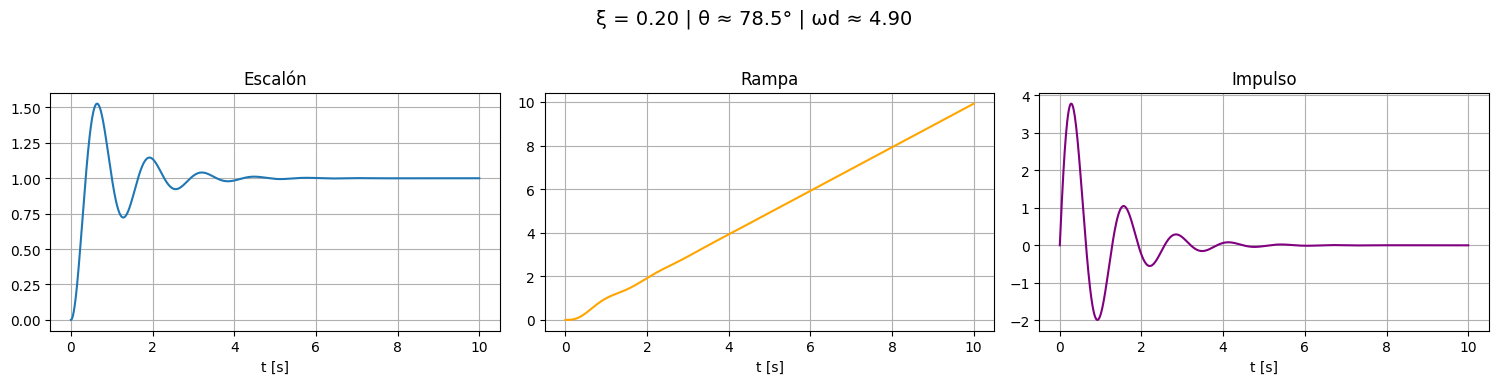

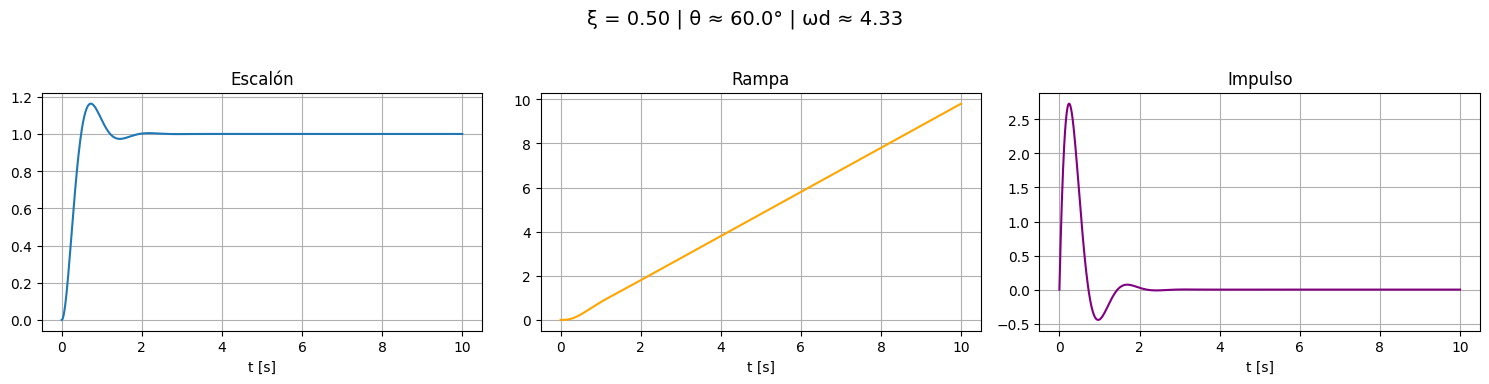

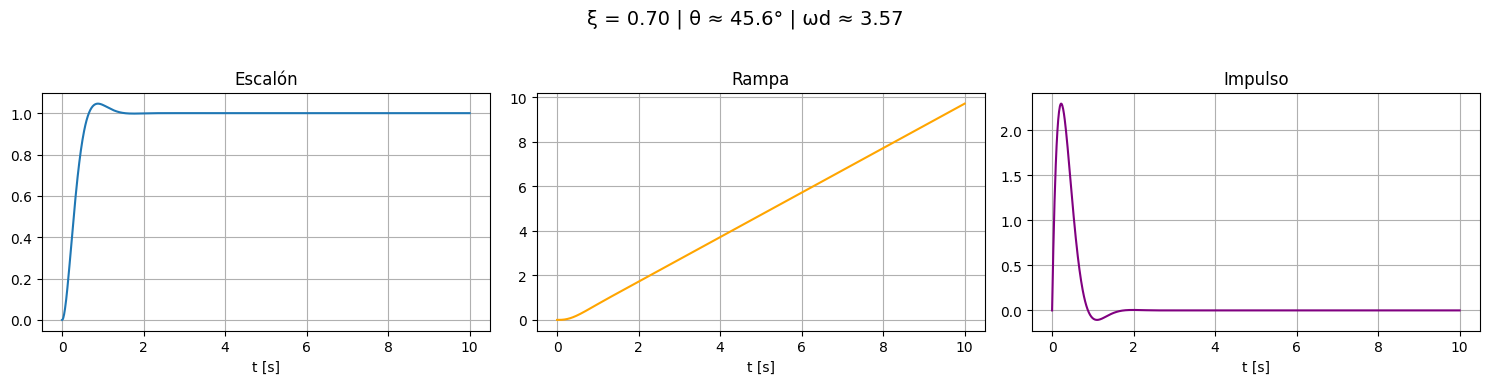

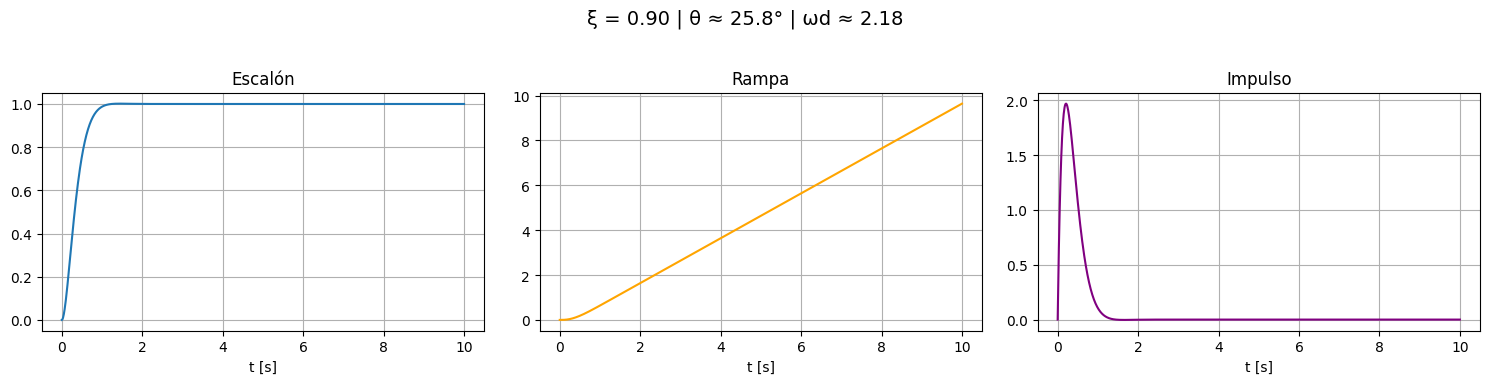

ξ	θ (°)	ωd
0.20	78.5	4.90
0.50	60.0	4.33
0.70	45.6	3.57
0.90	25.8	2.18


In [4]:
# --- Instalar librería necesaria ---
!pip install control --quiet

# --- Importar librerías ---
import numpy as np
import matplotlib.pyplot as plt
# Importar el módulo control directamente
import control # Cambiado de import control.matlab as ctrl

# --- Parámetros comunes ---
wn = 5
t = np.linspace(0, 10, 1000)

# --- Valores de amortiguamiento para comparar θ y wd ---
valores_xi = [0.2, 0.5, 0.7, 0.9]
resultados = []

# --- Simulación y gráficos ---
for xi in valores_xi:
    # Ensure sqrt argument is non-negative for real wd
    if 1 - xi**2 >= 0:
        wd = wn * np.sqrt(1 - xi**2)
        sigma = xi * wn
        # Handle sigma being zero to avoid issues with arctan2
        if sigma == 0:
            theta_rad = np.pi / 2 if wd > 0 else 0 # Purely imaginary poles (undamped)
        else:
             theta_rad = np.arctan2(wd, sigma)
        theta_deg = np.degrees(theta_rad)
    else:
        # Handle overdamped case where poles are real
        wd = 0
        sigma = xi * wn # For overdamped, sigma is the real part of the dominant pole
        theta_rad = 0
        theta_deg = 0 # Poles are on the real axis

    num = [wn**2]
    den = [1, 2*xi*wn, wn**2]
    # Usar control.tf ya que importamos control directamente
    G = control.tf(num, den)

    # Simulaciones
    # Usar control.step_response, control.forced_response, control.impulse_response
    t_step, y_step = control.step_response(G, t)
    t_ramp, y_ramp = control.forced_response(G, T=t, U=t)
    t_imp, y_imp = control.impulse_response(G, t)

    resultados.append((xi, theta_deg, wd))

    # --- Gráficas ---
    plt.figure(figsize=(15, 4))
    plt.suptitle(f"ξ = {xi:.2f} | θ ≈ {theta_deg:.1f}° | ωd ≈ {wd:.2f}", fontsize=14)

    plt.subplot(1, 3, 1)
    plt.plot(t_step, y_step)
    plt.title('Escalón')
    plt.grid(True)
    plt.xlabel('t [s]')

    plt.subplot(1, 3, 2)
    plt.plot(t_ramp, y_ramp, color='orange')
    plt.title('Rampa')
    plt.grid(True)
    plt.xlabel('t [s]')

    plt.subplot(1, 3, 3)
    plt.plot(t_imp, y_imp, color='purple')
    plt.title('Impulso')
    plt.grid(True)
    plt.xlabel('t [s]')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Mostrar tabla resumen ---
print("ξ\tθ (°)\tωd")
for xi, theta, wd in resultados:
    print(f"{xi:.2f}\t{theta:.1f}\t{wd:.2f}")